# UT3 - Práctica 9 REPASO

## Ejercicio 1

Antes de empezar a trabajar de verdad, tendrás que importar las librerías de NumPy y Matplotlib.Pyplot para poder trabajar con ellas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

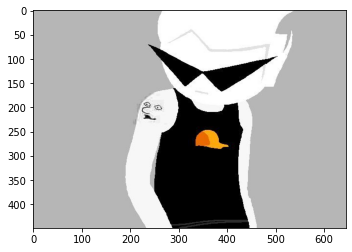

In [2]:
img = plt.imread("05_dirk.jpg")
plt.imshow(img)
plt.show()

---
## Ejercicio 2

Define una función que reciba una imagen a color como parámetro y la devuelva en escala de grises aplicando la media entre los 3 colores:

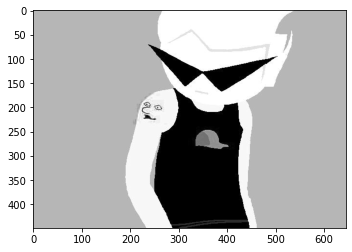

In [3]:
def grayscale(img):
    imgcol = (img[:,:,0]/img.shape[2]) + (img[:,:,1]/img.shape[2]) + (img[:,:,2]/img.shape[2])
    return imgcol

# Al ser en formato uint8 la imagen se pasa y hay errores
# def grayscale2(img):
#     imgcol = (img[:,:,0] + img[:,:,1] + img[:,:,2]) / img.shape[2]
#     return imgcol

img2 = grayscale(img)
plt.imshow(img2, cmap="gray")
plt.show()

---
## Ejercicio 3

Define una función que reciba una imagen en escala de grises y devuelva una copia de la misma, con todas las filas de píxels pares y las columnas impares en blanco:

In [21]:
def whitecopy(img):
    imgwhi = img.copy()
    filas = np.arange(1, img.shape[0], 2)
    columnas = np.arange(0, img.shape[1], 2)
    imgwhi[filas, :] = 1
    imgwhi[:, columnas] = 1
    return imgwhi

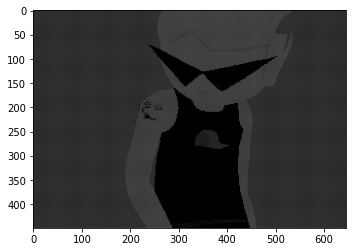

In [23]:
img3 = whitecopy(img2)
plt.imshow(img3, cmap="gray")
plt.show()

---
## Ejercicio 4

Crea una imagen de tamaño 500 x 500 con números aleatorios entre el 0 y 1. Después, modifica la imágen para que su mitad izquierda sea totalmente negra y su mitad superior derecha totalmente blanca. Muestra el resultado por pantalla:

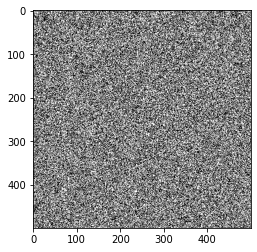

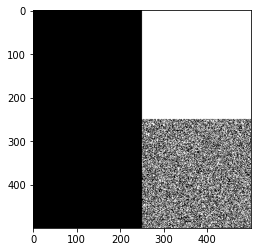

In [25]:
img4 = np.random.randint(2, size=(500,500))
plt.imshow(img4, cmap="gray")
plt.show()
img4[:,0:int(img4.shape[1]/2)] = 0
img4[:int(img4.shape[0]/2), int(img4.shape[1]/2):] = 1

plt.imshow(img4, cmap="gray")
plt.show()

---
## Ejercicio 5

Haz una función que reciba dos imágenes del mismo tamaño en escala de grises y un número del 0 al 100 (comprueba que el número está en el rango y que las imágenes tienen el mismo tamaño. De no ser así devuelve un "None"). La función devolverá una imagen que contenga ambas imágenes sumadas aplicando la proporción indicada en el 3º parámetro. Aquí tenéis un ejemplo con un único píxel:

```
imagen_1 = 10
imagen_2 = 5
proporcion = 80
imagen_resultante = (10 * 80 + (100 - 80) * 5) / 100
imagen_resultante = 9
```

In [6]:
def func5(img1, img2, num):
    if (num > 100 or num < 0 or img1.shape != img2.shape): return None
    img3 = (img1 * num + (100 - num) * img2) / 100
    return img3

(512, 512)
(512, 512)


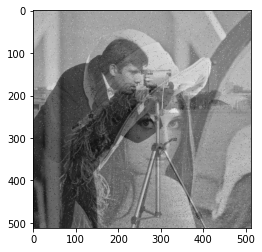

In [7]:
img5a = grayscale(plt.imread("07_camera.png"))
print(img5a.shape)
img5b = grayscale(plt.imread("03_spn_lenna.png"))
print(img5b.shape)
img5 = func5(img5a, img5b, 50)
if img5 is None: print("Pues nope")
else:
    plt.imshow(img5, cmap="gray")
    plt.show()

---
## Ejercicio 6

Haz una función que reciba como parámetro una imagen en escala de grises y un porcentaje de ruido. La función deberá aplicar, al porcentaje indicado de la imagen, ruido en forma de valores entre 0 y 1 (el 0.3 o 0.8 están permitidos). Por último, devolverá la imágen con ruido:

In [8]:
def func6(img, ruido):
    img2 = img.copy()
    for fil in range(1, img.shape[0]):
        for col in range(1, img.shape[1]):
            if random.random()*100 < ruido:
                img2[fil, col] = random.random()
    return img2

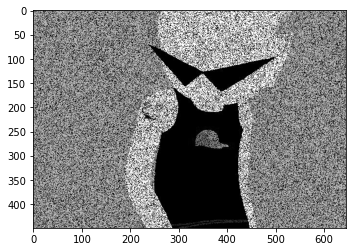

In [9]:
img6 = func6(img2, 30)
plt.imshow(img6, cmap="gray")
plt.show()

---
## Ejercicio 7

Haz una función que, recibiendo una imagen en escala de grises (2D) como parámetro, devuelva un string en binario aplicando la redundancia de código. También deberá devolver la tabla donde muestre la relación entre cada intensidad y su código binario:

In [10]:
def func7(img):
    img = img.round(5)
    redundancia = ""
    tabla1, tabla2, tabla3 = {}, {}, {}
    imgun = np.unique(img)
    longi = bin(len(imgun)).replace("0b","")
    for val in range(0, len(imgun)):
        tabla1[imgun[val]] = val

    for x in img:
        for y in x:
            b = bin(tabla1[y]).replace("0b","")
            while len(b) < len(longi):
                b = "0" + b
            redundancia += b
            tabla2[y] = b
    
    for i in sorted(tabla2):
        tabla3[i] = tabla2[i]
    return redundancia, tabla3

In [28]:
redundancia, tabla = func7(img2)
print(tabla)
print(redundancia)

{0.0: '000000000', 0.33333: '000000001', 0.66667: '000000010', 1.0: '000000011', 1.33333: '000000100', 1.66667: '000000101', 2.0: '000000110', 2.33333: '000000111', 2.66667: '000001000', 3.0: '000001001', 3.33333: '000001010', 3.66667: '000001011', 4.0: '000001100', 4.33333: '000001101', 4.66667: '000001110', 5.0: '000001111', 5.33333: '000010000', 5.66667: '000010001', 6.0: '000010010', 6.33333: '000010011', 6.66667: '000010100', 7.0: '000010101', 7.33333: '000010110', 7.66667: '000010111', 8.0: '000011000', 8.33333: '000011001', 8.66667: '000011010', 9.0: '000011011', 9.33333: '000011100', 9.66667: '000011101', 10.0: '000011110', 10.33333: '000011111', 10.66667: '000100000', 11.0: '000100001', 11.33333: '000100010', 11.66667: '000100011', 12.0: '000100100', 12.33333: '000100101', 12.66667: '000100110', 13.0: '000100111', 13.33333: '000101000', 13.66667: '000101001', 14.0: '000101010', 14.33333: '000101011', 14.66667: '000101100', 15.0: '000101101', 15.33333: '000101110', 15.66667: '0

---
## Ejercicio 8

Haz una función que recibiendo un string, un número de filas y un número de columnas, haga la operación inversa al ejercicio anterior y devuelva la imagen original:

In [12]:
def func8(string, filas, columnas):
    img = np.zeros(shape=(filas, columnas))
    string2 = string.split(" ")
    for x in range(0, filas):
        for y in range(0, columnas):
            # img[x,y] = string[columnas*filas*x+columnas*y:((filas*(x)-1+filas*columnas)+(columnas*(y+1)-1))+1]
            # print(string[columnas*filas*x+columnas*y:((filas*(x)-1*columnas)+(columnas*(y+1)-1))])
            # print(columnas*filas*x, columnas*y, columnas*filas*x+columnas*y, (filas*(x)-1*columnas) + columnas*(y+1)-1)
            # print((filas*(x)-1+columnas), columnas*(y+1)-1)
            img[x,y] = string2[x+x+y]
    return img

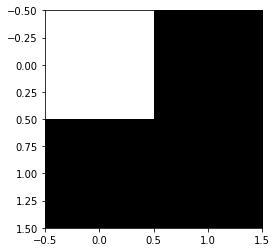

In [30]:
img8 = func8("11 00 00 00",2,2)
plt.imshow(img8, cmap="gray")
plt.show()

---
## Ejercicio 9

Haz una función que, recibiendo una imagen, devuelva la imagen umbralizada utilizando la media como punto de corte:

In [14]:
def func9(img):
    umbral = np.mean(img)
    return img > umbral

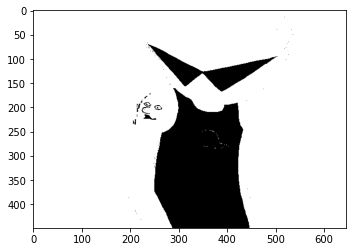

In [15]:
img9 = func9(img2)
plt.imshow(img9, cmap="gray")
plt.show()

---
## Ejercicio 10

Haz una función que, recibiendo una imagen, devuelva la imagen umbralizada utilizando la mediana como punto de corte:

In [16]:
def func10(img):
    umbral = np.median(img)
    return img > umbral

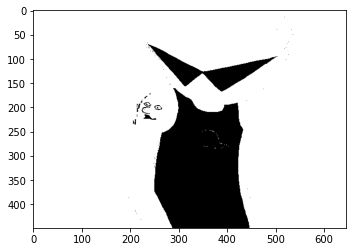

In [17]:
img10 = func10(img2)
plt.imshow(img9, cmap="gray")
plt.show()

---
## Ejercicio 11

Haz una función que recibiendo una imagen en escala de grises, utilice dos máscaras (que tú elijas pero definidas dentro de la función) para detectar bordes (una para bordes horizontales y otra para los verticales). Deverá devolver una única imagen con todos los bordes detectados:

In [59]:
def func11(img):
    imgbordes = np.zeros(img.shape)
    mask1 = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
    mask2 = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])
    for i in range(1,img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            imgbordes[i,j] = applymask(img, mask1, i, j)
            imgbordes[i,j] += applymask(img, mask2, i, j)
    return imgbordes

def applymask(img, mask, i, j):
    value = 0
    for x in range(-mask.shape[0]//2, mask.shape[0]//2, 1):
        for y in range(-mask.shape[1]//2, mask.shape[1]//2, 1):
            value += img[i+x,j+y] * mask[x+mask.shape[0]//2,y+mask.shape[1]//2]
    return value

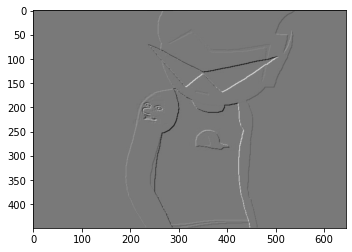

In [60]:
img11 = func11(img2)
plt.imshow(img11, cmap="gray")
plt.show()